Работа с Pandas DataFrame


https://pandas.pydata.org/docs/user_guide/10min.html

Работа с данными - чтение и запись CSV

In [1]:
import pandas as pd

df = pd.read_csv("data/healthcare-dataset-stroke-data.csv", index_col="id")

df.to_csv("lab1.csv")

Работа с данными - основные команды

In [2]:
df.info()

print(df.describe().transpose())

cleared_df = df.drop(["ever_married", "work_type", "Residence_type"], axis=1)
print(cleared_df.head())
print(cleared_df.tail())

sorted_df = cleared_df.sort_values(by="gender")
print(sorted_df.head())
print(sorted_df.tail())

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB
                    count        mean        std    min     25%     50%  \
age                5110.0   43.226614  22.612647   0.08  25.000  45.000   
hypertension       5110.0    0.097456   0.296607   0.00 

Работа с данными - работа с элементами

In [13]:
print(df["age"])

print(df.loc[63864])

print(df.loc[63864, "Residence_type"])

print(df.loc[63864:63898, ["age", "Residence_type"]])

print(df[0:3])

print(df.iloc[0])

print(df.iloc[3:5, 0:2])

print(df.iloc[[3, 4], [0, 1]])

id
9046     67.0
51676    61.0
31112    80.0
60182    49.0
1665     79.0
         ... 
18234    80.0
44873    81.0
19723    35.0
37544    51.0
44679    44.0
Name: age, Length: 5110, dtype: float64
gender                  Male
age                     62.0
hypertension               0
heart_disease              0
ever_married             Yes
work_type            Private
Residence_type         Rural
avg_glucose_level     107.61
bmi                     31.3
smoking_status       Unknown
stroke                     0
Name: 63864, dtype: object
Rural


KeyError: "['Возраст'] not in index"

Работа с данными - отбор и группировка

In [4]:
s_values = df["gender"].unique()
print(s_values)

s_total = 0
for s_value in s_values:
    count = df[df["gender"] == s_value].shape[0]
    s_total += count
    print(s_value, "count =", count)
print("Total count = ", s_total)

print(df.groupby(["bmi", "smoking_status"]).size().reset_index(name="Count"))  # type: ignore

['Male' 'Female' 'Other']
Male count = 2115
Female count = 2994
Other count = 1
Total count =  5110
       bmi smoking_status  Count
0     10.3        Unknown      1
1     11.3        Unknown      1
2     11.5   never smoked      1
3     12.0        Unknown      1
4     12.3        Unknown      1
...    ...            ...    ...
1185  66.8        Unknown      1
1186  71.9   never smoked      1
1187  78.0         smokes      1
1188  92.0   never smoked      1
1189  97.6        Unknown      1

[1190 rows x 3 columns]


Виртуализация - Исходные данные


In [5]:
data = df[["age", "work_type", "smoking_status"]].copy()
data.dropna(subset=["smoking_status"], inplace=True)
print(data)

        age      work_type   smoking_status
id                                         
9046   67.0        Private  formerly smoked
51676  61.0  Self-employed     never smoked
31112  80.0        Private     never smoked
60182  49.0        Private           smokes
1665   79.0  Self-employed     never smoked
...     ...            ...              ...
18234  80.0        Private     never smoked
44873  81.0  Self-employed     never smoked
19723  35.0  Self-employed     never smoked
37544  51.0        Private  formerly smoked
44679  44.0       Govt_job          Unknown

[5110 rows x 3 columns]


Визуализация - Линейная диаграмма

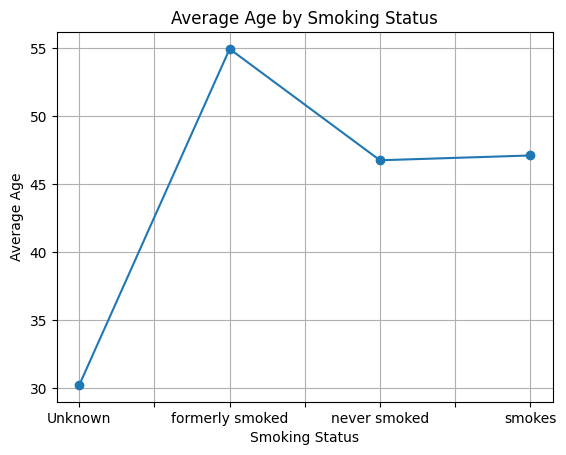

In [14]:
import matplotlib.pyplot as plt
average_age = data.groupby("smoking_status")["age"].mean()
average_age.plot(
    kind="line",
    marker="o",
    title="Average Age by Smoking Status",
    xlabel="Smoking Status",
    ylabel="Average Age",
)
plt.grid(True)
plt.show()

Визуализация - столбчатая диаграмма

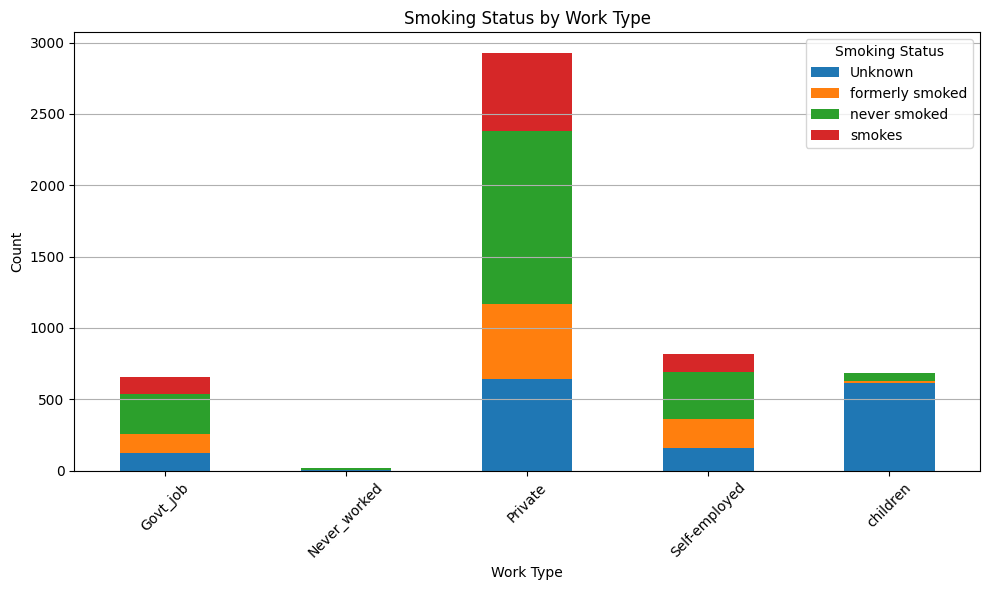

In [7]:
pivot_table = data.groupby(["work_type", "smoking_status"]).size().unstack()

pivot_table.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.title("Smoking Status by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Smoking Status")
plt.grid(axis='y')
plt.tight_layout()  

plt.show()

Визуализация - Гистограмма

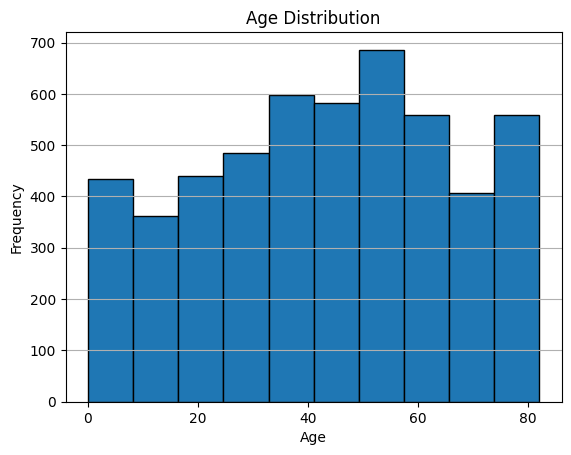

In [8]:
plt.hist(data["age"], bins=10, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()

Визуализация - Ящик с усами

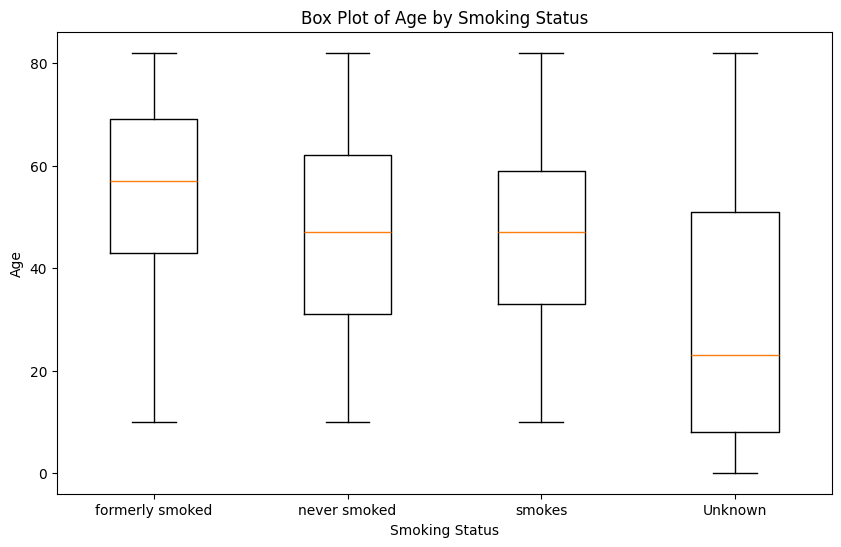

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = df[["age", "work_type", "smoking_status"]].copy()
data.dropna(subset=["smoking_status"], inplace=True)


plt.figure(figsize=(10, 6))

box_data = [
    data[data["smoking_status"] == status]["age"]
    for status in data["smoking_status"].unique()
]
plt.boxplot(box_data)

plt.xticks(
    range(1, len(data["smoking_status"].unique()) + 1),
    list(data["smoking_status"].unique()),  )

plt.title("Box Plot of Age by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Age")

plt.show()

Визуализация - диаграммы с областями

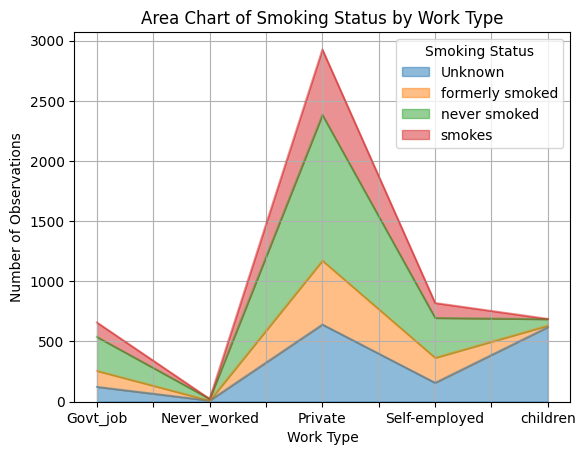

In [10]:
data = df[["age", "work_type", "smoking_status"]].copy()
data.dropna(subset=["smoking_status"], inplace=True)

grouped_data = (
    data.groupby(["work_type", "smoking_status"]).size().unstack(fill_value=0)
)

grouped_data.plot(kind="area", alpha=0.5, stacked=True)

plt.title("Area Chart of Smoking Status by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Number of Observations")
plt.legend(title="Smoking Status")
plt.grid(True)

plt.show()

Визуализация - диаграммы рассеяния

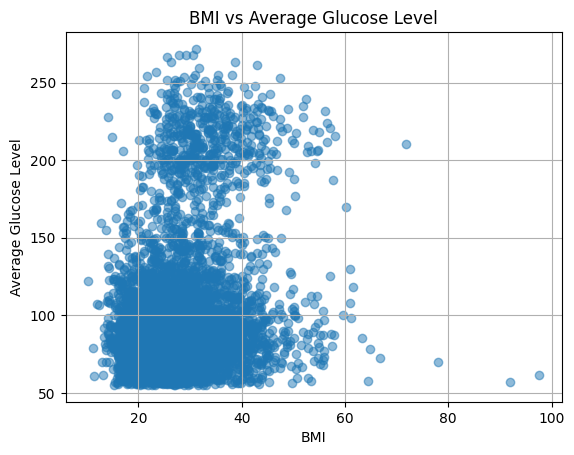

In [11]:
plt.scatter(df["bmi"], df["avg_glucose_level"], alpha=0.5)
plt.title("BMI vs Average Glucose Level")
plt.xlabel("BMI")
plt.ylabel("Average Glucose Level")
plt.grid(True)
plt.show()

Визуализация - круговая диаграмма

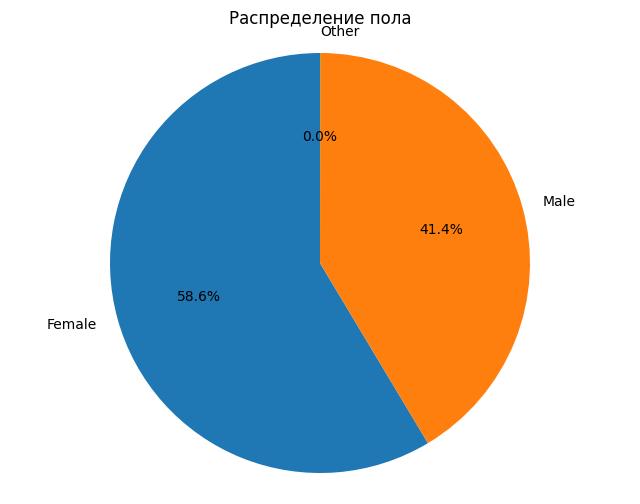

In [15]:
gender_counts = df["gender"].value_counts()

labels = [str(label) for label in gender_counts.index]

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Gender")
plt.axis("equal")
plt.show()